In [2]:
%%time
import pandas_datareader.data as web
import pandas as pd
import datetime 
import numpy as np

tickers = ['SVMK', 'BILL', 'SPT']
ls_key = 'Adj Close'
start = datetime.datetime(2020,8,27)
end = datetime.date.today()    
f = web.DataReader(tickers, 'yahoo',start,end)

cleanData = f[ls_key]
px = pd.DataFrame(cleanData)
px.head()

Wall time: 2.78 s


Symbols,BILL,SPT,SVMK
Date,,,
2020-08-27,106.059998,34.910000,24.910000
2020-08-28,100.309998,36.610001,24.980000
2020-08-31,98.980003,38.750000,24.889999
2020-09-01,98.330002,40.599998,25.840000
2020-09-02,100.040001,39.090000,26.080000


In [28]:
cum_ret.columns

Index(['BILL', 'SPT', 'SVMK'], dtype='object')

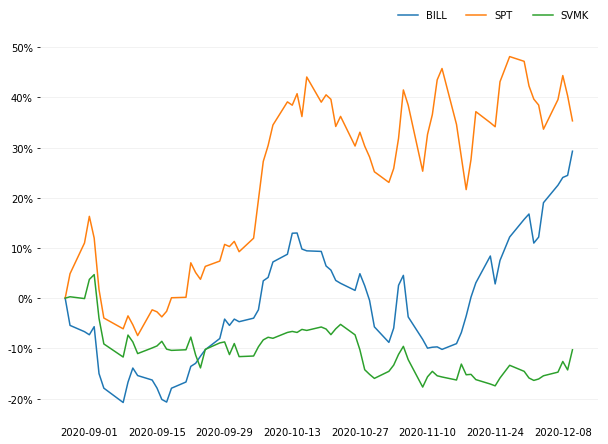

In [28]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

plt.figure()
fig = plt.gcf()
fig.set_size_inches(10, 7)
ret = px.pct_change(periods=1)
cum_rets = pd.DataFrame(columns=list(ret.columns))
for c, returns in ret.items():
    cum_rets[c] = np.cumprod(1+returns)-1
cum_rets.fillna(0, inplace=True)
labels = list(cum_rets.columns)
for c, cum_ret in cum_rets.items():
    plt.plot(cum_ret, label=c)
ax = plt.gca()
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
remove_spines = ['right', 'top', 'bottom', 'left']
for spine in remove_spines:
    ax.spines[spine].set_visible(False)
plt.grid(which='major',axis='y', alpha=0.2)
plt.tick_params(bottom=False, labelbottom=True)
plt.legend(loc=1, frameon=False, ncol=3, bbox_to_anchor=(1,1.1))
plt.show()

In [25]:
end_rets = np.array(cum_rets.iloc[-1,:])
weight = 1/3
eq_weights = (np.array([1]*3))*weight
end_rets @ eq_weights

0.18106096047489684

In [26]:
end_rets

array([ 0.29275885,  0.35319398, -0.10276995])